In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df_aggpits =pd.read_pickle(r'data/df_aggpits.pkl')

In [3]:
from constants import TVC02
sites = pd.DataFrame({'site':TVC02})
sites.site.replace({'RS':'RP'}, regex=True, inplace=True)
sites=list(sites.site.values)

In [4]:
mp = pd.read_pickle(r'data/ref_mp.pkl')

Text(0.5, 0, 'SSA ($m^2 \\cdot kg^{-1}$)')

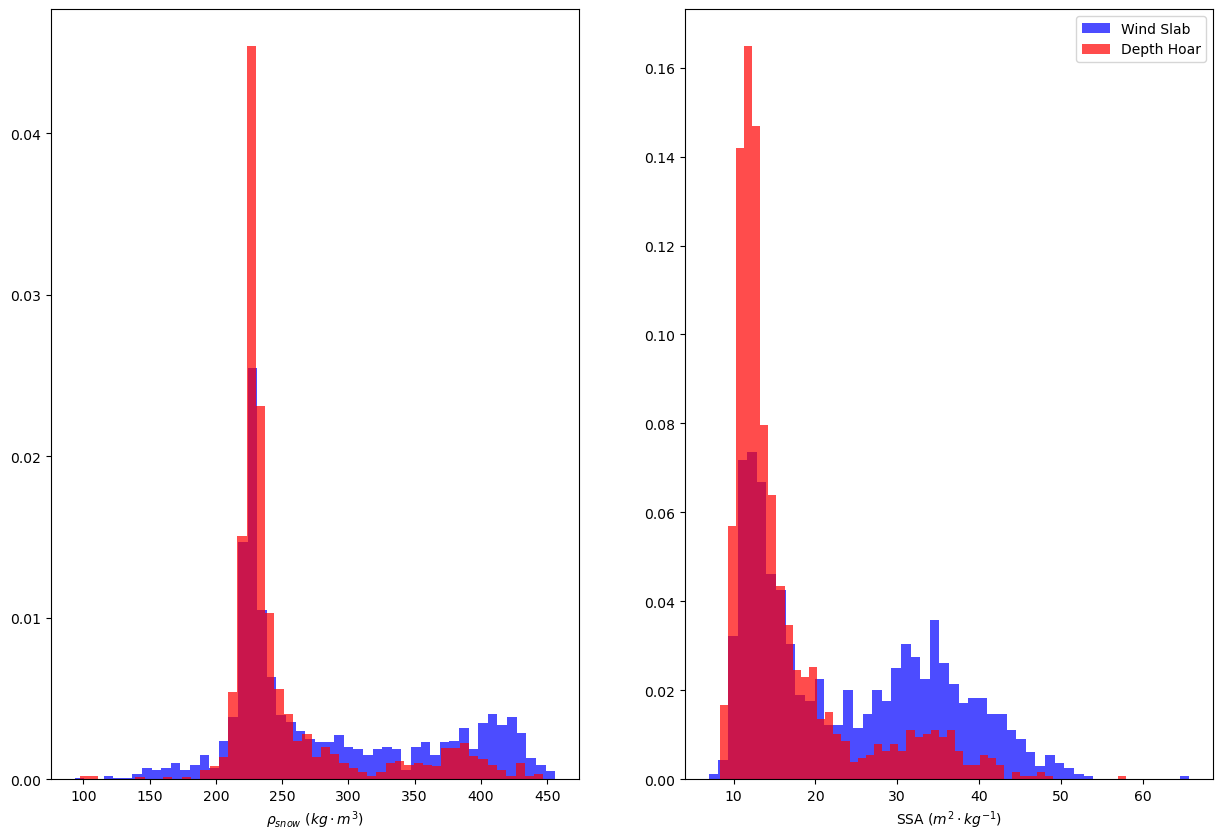

In [5]:
rho_ws = np.array([])
rho_dh = np.array([])

ssa_ws = np.array([])
ssa_dh = np.array([])
pex_ws = np.array([])
pex_dh = np.array([])

for site in sites:

    for profile in df_aggpits[site].dropna().keys():

        rho_ws=np.concatenate((rho_ws,df_aggpits[site][profile]['density'][df_aggpits[site][profile]['grain_type']=='M']))
        rho_dh=np.concatenate((rho_dh,df_aggpits[site][profile]['density'][df_aggpits[site][profile]['grain_type']=='H']))

        ssa_ws=np.concatenate((ssa_ws,df_aggpits[site][profile]['ssa'][df_aggpits[site][profile]['grain_type']=='M']))
        ssa_dh=np.concatenate((ssa_dh,df_aggpits[site][profile]['ssa'][df_aggpits[site][profile]['grain_type']=='H']))

        pex_ws=np.concatenate((pex_ws,df_aggpits[site][profile]['p_ex'][df_aggpits[site][profile]['grain_type']=='M']))
        pex_dh=np.concatenate((pex_dh,df_aggpits[site][profile]['p_ex'][df_aggpits[site][profile]['grain_type']=='H']))


fig, ax = plt.subplots(1,2, figsize=(15,10))

hist_rho_ws=ax[0].hist(rho_ws, bins=50, density=True, alpha=0.7, color = 'b')
# ax[0].axvline(x=309, color='k', label='SVS-2 Wind Slab')
hist_rho_dh=ax[0].hist(rho_dh, bins=50, density=True, alpha=0.7, color = 'r')
# ax[0].axvline(x=106.3, color='k', linestyle='--', label='SVS-2 Depth Hoar')

hist_ssa_ws=ax[1].hist(ssa_ws, bins=50, density=True, alpha=0.7, label='Wind Slab', color='b')
# ax[1].axvline(x=28.7, color='k', label='SVS-2 Wind Slab')
hist_ssa_dh=ax[1].hist(ssa_dh, bins=50, density=True, alpha=0.7, label='Depth Hoar', color='r')
# ax[1].axvline(x=8.32, color='k', linestyle='--', label='SVS-2 Depth Hoar')

# hist_pex_ws=ax[2].hist(pex_ws, bins=50, density=True, alpha=0.7, label='Wind Slab')
# hist_pex_dh=ax[2].hist(pex_dh, bins=50, density=True, alpha=0.7, label='Depth Hoar')

ax[1].legend()

ax[0].set_xlabel('$\\rho_{snow}$ $(kg \\cdot m^3)$')
ax[1].set_xlabel('SSA ($m^2 \\cdot kg^{-1}$)')
# ax[2].set_xlabel('$l_{ex}$ (mm)')

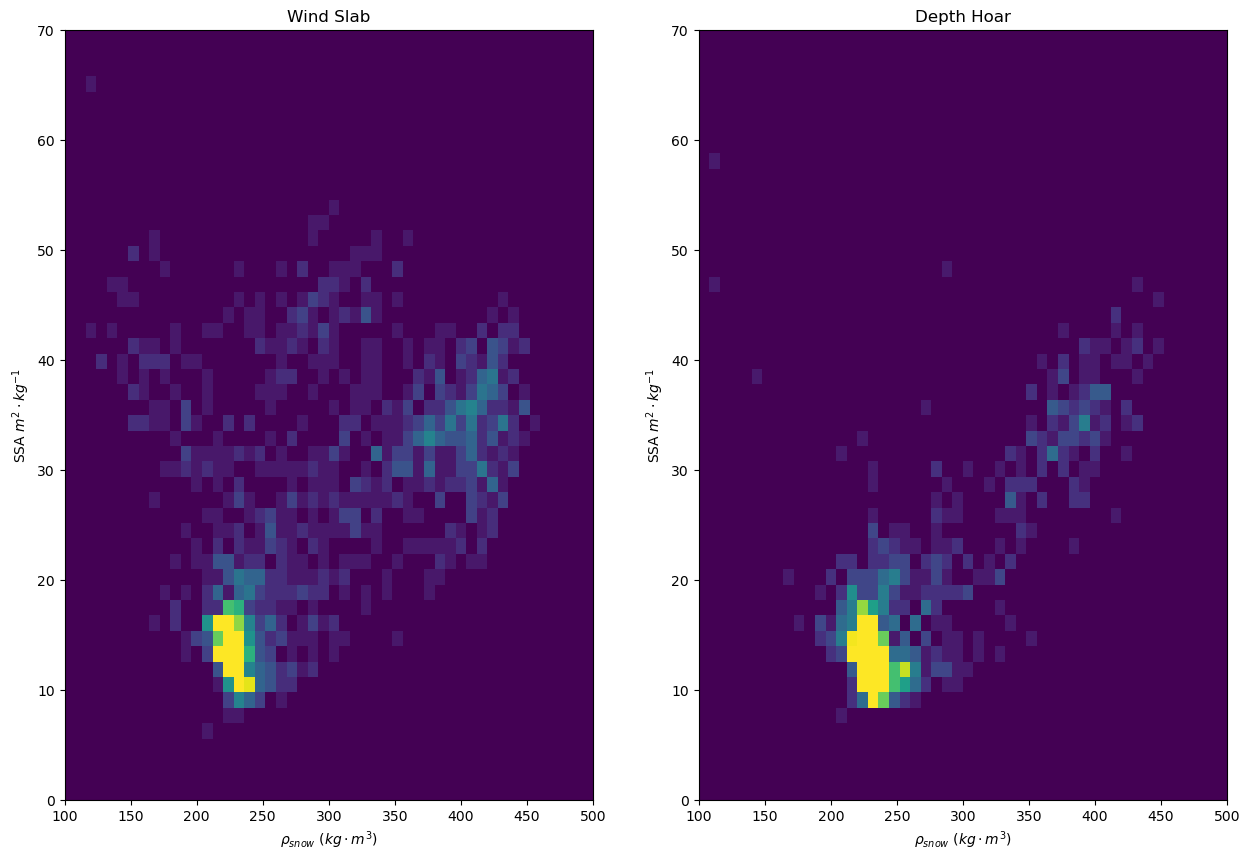

In [6]:
fig, ax = plt.subplots(1,2,figsize=(15,10))

hist_ws = ax[0].hist2d(rho_ws, ssa_ws,bins=50,density=True, vmax = 0.001, range = [[100,500], [0,70]])
hist_dh = ax[1].hist2d(rho_dh, ssa_dh,bins=50,density=True, vmax = 0.001, range = [[100,500], [0,70]])

gt = ['Wind Slab', 'Depth Hoar']

for i in range(2):

    ax[i].set_xlabel('$\\rho_{snow}$ $(kg \\cdot m^3)$')
    ax[i].set_ylabel('SSA $m^2 \\cdot kg^{-1}$')
    ax[i].set_title(gt[i])
    ax[i].set_ylim(0,70)
    ax[i].set_xlim(100,500)



31.855

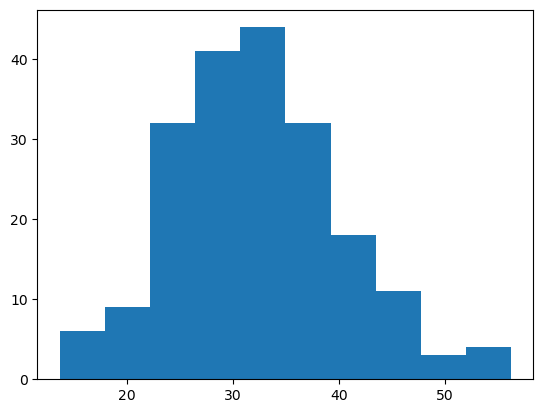

In [7]:
plt.hist(mp.loc[(mp.site==site.replace('RP','RS'))].depth)
mp.loc[(mp.site==site.replace('RP','RS'))].depth.median()

In [8]:
pit_stats = {}

rho_ws = np.array([])
rho_dh = np.array([])
ssa_ws = np.array([])
ssa_dh = np.array([])
pex_ws = np.array([])
pex_dh = np.array([])
t_ws = np.array([])
t_dh = np.array([])
dh_frac = np.array([])

for site in sites:

    pit_stats[site]={}

    for profile in df_aggpits[site].dropna().keys():

        rho_ws=np.concatenate((rho_ws,df_aggpits[site][profile]['density'][df_aggpits[site][profile]['grain_type']=='M']))
        rho_dh=np.concatenate((rho_dh,df_aggpits[site][profile]['density'][df_aggpits[site][profile]['grain_type']=='H']))

        ssa_ws=np.concatenate((ssa_ws,df_aggpits[site][profile]['ssa'][df_aggpits[site][profile]['grain_type']=='M']))
        ssa_dh=np.concatenate((ssa_dh,df_aggpits[site][profile]['ssa'][df_aggpits[site][profile]['grain_type']=='H']))

        pex_ws=np.concatenate((pex_ws,df_aggpits[site][profile]['p_ex'][df_aggpits[site][profile]['grain_type']=='M']))
        pex_dh=np.concatenate((pex_dh,df_aggpits[site][profile]['p_ex'][df_aggpits[site][profile]['grain_type']=='H']))

        t_ws=np.concatenate((t_ws,df_aggpits[site][profile]['temperature'][df_aggpits[site][profile]['grain_type']=='M']))
        t_dh=np.concatenate((t_dh,df_aggpits[site][profile]['temperature'][df_aggpits[site][profile]['grain_type']=='H']))
        
        dh_frac=np.concatenate((dh_frac,[df_aggpits[site][profile]['thickness'][df_aggpits[site][profile]['grain_type']=='H'].sum()/
                                df_aggpits[site][profile]['thickness'].sum()]))

    depth = mp.loc[(mp.site==site.replace('RP','RS'))].depth.median()

    pit_stats[site]={'h':depth, 'dh_frac':np.median(dh_frac),
                     'rho_ws':np.median(rho_ws),'rho_dh':np.median(rho_dh),
                     'ssa_ws':np.median(ssa_ws),'ssa_dh':np.median(ssa_dh),
                     'pex_ws':np.median(pex_ws),'pex_dh':np.median(pex_dh),
                     't_ws':np.median(t_ws),'t_dh':np.median(t_dh)}
    
stat_pits = pd.DataFrame(pit_stats)



    

In [9]:
stat_pits.to_pickle(r'data/df_Site_pit_stats.pkl')

In [10]:
stat_pits.loc['dh_frac']

RP16    0.723180
RP17    0.703557
RP18    0.649616
RP19    0.567988
RP20    0.555556
RP21    0.478221
RP22    0.473684
RP23    0.482759
RP24    0.555556
RP25    0.589041
RP26    0.580420
RP27    0.580420
RP28    0.589041
RP29    0.594595
RP30    0.602649
RP31    0.602649
SC02    0.597315
SD02    0.598658
SM02    0.595955
SO02    0.586207
ST02    0.586207
SV02    0.565012
Name: dh_frac, dtype: float64

In [11]:
pits={}

for site in sites:

    pits[site]={}

    pits[site]['thickness']=np.array([stat_pits[site].h*(1-stat_pits[site].dh_frac), stat_pits[site].h*stat_pits[site].dh_frac])/100
    pits[site]['density']=np.array([stat_pits[site].rho_ws,stat_pits[site].rho_dh])
    pits[site]['ssa']=np.array([stat_pits[site].ssa_ws,stat_pits[site].ssa_dh])
    pits[site]['temperature']=np.array([stat_pits[site].t_ws,stat_pits[site].t_dh])
    pits[site]['p_ex']=np.array([stat_pits[site].pex_ws,stat_pits[site].pex_dh])
    pits[site]['grain_type']=np.array(['M','H'])

df_pits = pd.DataFrame(pits)

In [12]:
df_pits

,RP16,RP17,RP18,RP19,RP20,RP21,RP22,RP23,RP24,RP25,...,RP28,RP29,RP30,RP31,SC02,SD02,SM02,SO02,ST02,SV02
thickness,"[0.13935114942528737, 0.3640488505747127]","[0.1389130434782609, 0.32968695652173907]","[0.1612290281329923, 0.2989209718670077]","[0.1867157731157731, 0.24548422688422689]","[0.2107555555555556, 0.2634444444444444]","[0.23281760435571688, 0.2133823956442831]","[0.256421052631579, 0.23077894736842106]","[0.24093103448275863, 0.22486896551724136]","[0.2220444444444445, 0.27755555555555556]","[0.19265753424657528, 0.2761424657534247]",...,"[0.1882602739726027, 0.2698397260273973]","[0.19331756756756757, 0.2835324324324324]","[0.190251655629139, 0.28854834437086097]","[0.15558278145695362, 0.2359672185430464]","[0.17134228187919454, 0.25415771812080545]","[0.18855060402684556, 0.2812493959731544]","[0.1768100852530382, 0.2607899147469618]","[0.1575724137931034, 0.2232275862068966]","[0.18546206896551723, 0.2627379310344828]","[0.13856548463356977, 0.17998451536643023]"
density,"[229.3, 228.5]","[232.0, 228.4]","[237.4, 228.2]","[238.7, 228.9]","[238.6, 229.5]","[237.3, 229.4]","[238.2, 229.64999999999998]","[236.0, 229.35000000000002]","[238.0, 229.3]","[240.3, 229.6]",...,"[243.375, 229.6]","[242.7, 229.9]","[244.2, 230.1]","[244.9, 230.5]","[243.4, 230.5]","[243.375, 230.7]","[242.7, 230.7]","[242.95, 230.7]","[243.7, 230.6]","[243.8, 230.7]"
ssa,"[21.110955752116865, 14.358912921642068]","[23.43344058649015, 14.492220349543299]","[22.753327300353785, 14.410105173238492]","[20.271988113498633, 14.148320710797101]","[19.802664538332834, 13.711042752567103]","[17.232741709388126, 13.775332438919323]","[17.5083132719561, 13.688791000312582]","[17.681660254733362, 13.443718096299108]","[18.74702978133195, 13.636361313653708]","[19.64574014217814, 13.2685466003159]",...,"[20.252442111757894, 13.058276774594658]","[19.77150377295645, 12.974049718736083]","[20.9800389405739, 13.062385449484374]","[21.110955752116865, 13.04413668479722]","[20.53664616507034, 13.058071559332994]","[21.409263425819198, 13.085009675889564]","[21.04550165543315, 13.10632247116017]","[21.042919882186553, 13.143123442271001]","[21.258903580676066, 13.085009675889564]","[20.937153306369872, 13.07541969514492]"
temperature,"[248.54998779296875, 253.25]","[245.14999389648438, 253.25]","[245.14999389648438, 253.04998779296875]","[245.14999389648438, 253.25]","[243.4499969482422, 252.75]","[243.4499969482422, 252.75]","[243.4499969482422, 252.75]","[245.14999389648438, 253.04998779296875]","[245.14999389648438, 252.84999084472656]","[245.14999389648438, 253.04998779296875]",...,"[245.25, 253.04998779296875]","[245.64999389648438, 253.25]","[246.04998779296875, 253.25]","[246.04998779296875, 253.04998779296875]","[246.04998779296875, 253.04998779296875]","[246.64999389648438, 253.04998779296875]","[247.14999389648438, 253.04998779296875]","[246.89999389648438, 253.04998779296875]","[246.64999389648438, 253.04998779296875]","[246.54998779296875, 253.04998779296875]"
p_ex,"[0.0001549574456776675, 0.00022957922843445315]","[0.00013970448019258707, 0.00022765449325257454]","[0.00014317180068230257, 0.00022843502335486004]","[0.0001559510007529663, 0.00023215883718402032]","[0.00015972917817839955, 0.00024029709915370648]","[0.00018724937935479425, 0.00023947356104579953]","[0.00018677041329135717, 0.00023978357352830656]","[0.000183715684135378, 0.00024342917072362784]","[0.0001716278998252534, 0.0002411628964736953]","[0.00015801751385229515, 0.00024587507940032773]",...,"[0.00015561066968504687, 0.00025155761556524165]","[0.00015741504441200673, 0.00025240727436294996]","[0.00015330532264558387, 0.0002507179658270407]","[0.00015068125183762885, 0.0002508989755273997]","[0.00015497507125216897, 0.00025070842562358297]","[0.00014842122481626948, 0.0002498808684621729]","[0.0001496378293967018, 0.0002496347089729663]","[0.0001491186848928896, 0.0002492910849426533]","[0.00014639907656255146, 0.0002498808684621729]","[0.0001499562072201581, 0.0002498870231

In [13]:
df_pits.to_pickle(r'data/df_stat_pits.pkl')